In [1]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset("titanic")

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
X=df[["pclass","sex","age","sibsp","parch","fare"]]
y=df["survived"]

In [5]:
X=pd.get_dummies(X,columns=["sex"])
X

,pclass,age,sibsp,parch,fare,sex_female,sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1
887,1,19.0,0,0,30.0000,1,0
888,3,NaN,1,2,23.4500,1,0
889,1,26.0,0,0,30.0000,0,1


In [6]:
X.age.fillna(X.age.mean(),inplace=True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
cols =["age","fare"]
scalar=StandardScaler()

X[cols] = scalar.fit_transform(X[cols])

X

,pclass,age,sibsp,parch,fare,sex_female,sex_male
0,3,-0.592481,1,0,-0.502445,0,1
1,1,0.638789,1,0,0.786845,1,0
2,3,-0.284663,0,0,-0.488854,1,0
3,1,0.407926,1,0,0.420730,1,0
4,3,0.407926,0,0,-0.486337,0,1
...,...,...,...,...,...,...,...
886,2,-0.207709,0,0,-0.386671,0,1
887,1,-0.823344,0,0,-0.044381,1,0
888,3,0.000000,1,2,-0.176263,1,0
889,1,-0.284663,0,0,-0.044381,0,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [10]:
model = KNeighborsClassifier(n_neighbors=5)

In [11]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.770949720670391

In [13]:
y_pred = model.predict(X_test)

In [14]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

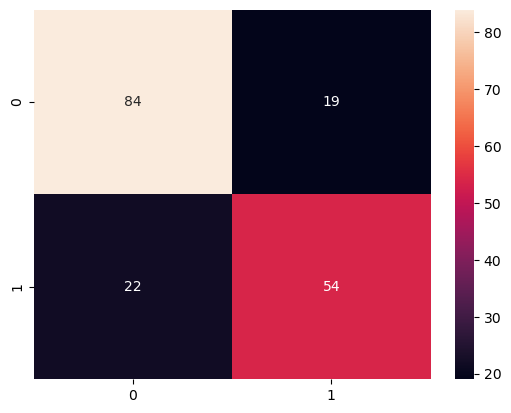

In [16]:
sns.heatmap(cm,annot=True, fmt="g")

In [21]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(model.score(X_test,y_test))

[[88 15]
 [32 44]]
0.7374301675977654


In [23]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(model.score(X_test,y_test))

[[84 19]
 [22 54]]
0.770949720670391


# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(model.score(X_test,y_test))
print("Classification Report:\n",classification_report(y_test,y_pred))

[[85 18]
 [24 52]]
0.7653631284916201
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       103
           1       0.74      0.68      0.71        76

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.76      0.77      0.76       179



# Logistic Regression
* Uses "S shaped" sigmoid function to classify the target

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cm)
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix
 [[86 17]
 [25 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       103
           1       0.75      0.67      0.71        76

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.76      0.77      0.76       179



# SVM Support Vector Machine
* Uses Hyperplane to classify the data

* SVC = support vector classifier
* SVR = Support vector regressor

In [43]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cm)
print("Accuracy :",model.score(X_test,y_test))
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix
 [[91 12]
 [23 53]]
Accuracy : 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       103
           1       0.82      0.70      0.75        76

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.80      0.80       179



# Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cm)
print("Accuracy :",model.score(X_test,y_test))
print("Classification Report:\n",classification_report(y_test,y_pred))

Confusion Matrix
 [[84 19]
 [25 51]]
Accuracy : 0.7541899441340782
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       103
           1       0.73      0.67      0.70        76

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.75      0.75      0.75       179



In [47]:
for i,names in enumerate(["Ali","Abbas","Ali2","Abbas2"]):
    print(i)
    print(names)

0
Ali
1
Abbas
2
Ali2
3
Abbas2


# Select The Best Model From Selected Models

In [1]:
# define the 5 models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), SVC(), RandomForestClassifier()]
model_names = ["Logistic Regression", "Decision Tree", "KNN", "Naive Bayes", "SVM", "Random Forest"]

# train and evaluate each model
best_index = 0
best_score = 0
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score > best_score:
        best_index = i
        best_score = score
        
# print the best model
print("Best model is: ", model_names[best_index])
print("And its score is:", best_score)

NameError: name 'X_train' is not defined

### Using Cross Validation Score

In [52]:
from sklearn.model_selection import cross_val_score

models = [LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), SVC(), RandomForestClassifier()]
names = ["Logistic Regression", "Decision Tree", "KNN", "Naive Bayes", "SVM", "Random Forest"]

k = 10 #folds
for name,model in zip(names,models):
    cv_scores = cross_val_score(model,X_train,y_train, cv=k)
    print(f"{name} CV accuracy: {np.mean(cv_scores):.3f} +/- {np.std(cv_scores):.3f}")


Logistic Regression CV accuracy: 0.812 +/- 0.025
Decision Tree CV accuracy: 0.805 +/- 0.044
KNN CV accuracy: 0.822 +/- 0.040
Naive Bayes CV accuracy: 0.801 +/- 0.033
SVM CV accuracy: 0.819 +/- 0.035
Random Forest CV accuracy: 0.845 +/- 0.024


# Using GridSearch 

In [55]:
from sklearn.model_selection import GridSearchCV

# Define the parameters grid

param_grid = {'C':[0.1,1],
             'kernel':["linear","rbf"],
             'gamma':[0.1,1]}

grid_search = GridSearchCV(SVC(),param_grid , cv=5)

grid_search.fit(X_train,y_train)

print("Best Parameters : ",format(grid_search.best_params_))
print("Best Cross Validation Score : ",format(grid_search.best_score_))

Best Parameters :  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross Validation Score :  0.8216586230670739


In [56]:
from sklearn.model_selection import GridSearchCV

# Define the parameters grid

param_grid = {'C':[0.1,1,10],
             'kernel':["linear","rbf"],
             'gamma':[0.1,1,10]}

grid_search = GridSearchCV(SVC(),param_grid , cv=5)

grid_search.fit(X_train,y_train)

print("Best Parameters : ",format(grid_search.best_params_))
print("Best Cross Validation Score : ",format(grid_search.best_score_))

Best Parameters :  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross Validation Score :  0.8244755244755245
